# Лабораторная работа №2
# Моделирование работы касс супермаркета при помощи библиотеки SimPy

### Задача
Смоделировать работу супермаркета по следующим условиям:
* Поток клиентов имеет распределение Пуассона с интенсивностью l = 3 человека в минуту
* Средний чек составляет 200±50 рублей
* Время обслуживания клиента t_service = 2 минуты
* Если все кассы заняты, то клиент встаёт в самую короткую очередь
* Если очередь в каждой кассе 5 и более человек, клиент покидает магазин
* Кассы работают до последнего клиента

Построить график доходов и недополученных доходов магазина в зависимости от числа касс.
(Определить оптимальное число кассиров, если стоимость содержания кассы 100 т.р. в месяц.)

Скорректировать программу так, чтобы задать различную интенсивность потока клиентов в разное время дня.

### Импорт требуемых библиотек

На станции техобслуживания автомобилей 4 рабочих выполняют два вида работ: шиномонтаж и балансировку. Причем каждую операцию выполняют два рабочих, но для шиномонтажа существуют два рабочих места. Поток автомобилей является пуассоновским со значением среднего интервала, равным 35 мин. 80% автомобилей будут подвергаться и шиномонтажу и балансировки, а остальные — равновероятностно одной из операций. Время обслуживания автомобиля распределено экспоненциально со значением среднего, равным 45 мин для монтажа и 15 мин для балансировки. Если клиенты подъезжают и не застают свободного места для ожидания, они уезжают .

Необходимо решить, какое число мест на стоянке следует отвести для автомобилей, ожидающих обслуживания. Необходимо написать модель такой системы и использовать ее для исследования системы при использовании одного, двух, трех мест на стоянке. Определить оптимальное числа мест на стоянке. В каждом из этих случаев надо моделировать работу в течение восьмичасового рабочего дня и оценить долю клиентов, оставшихся без обслуживания.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import simpy
import random

### Глобальные переменные для накопления статистики

In [8]:
q_len = 0  # Длина очереди (общее число человек во все кассы)
t_service = 2  # Время обслуживания - 2 минуты
n_kass = 3  # Число касс
sum_revenue = 0  # Суммарный доход магазина
sum_loss = 0  # Недополученный доход
client_loss = 0  # Число ушедших клиентов

### Определим модель поведения клиента

In [18]:
def client(env, kassa, start_time):
    global q_len
    global t_service
    global n_kass
    global sum_revenue
    global sum_loss
    global client_loss
    money = 150 + 100 * np.random.random()  # Сколько денег планирует потратить клиент
    # Начинаем симуляцию с момента прихода
    yield env.timeout(start_time)
    # print(f"Клиент пришёл в {env.now}")
    with kassa.request() as req:
        results = yield req | env.timeout(5)  # Клиент ждёт 5 минут и уходит
        print(results)
        if req in results:
            print(1)
            yield env.timeout(t_service)  # Время обслуживания
            sum_revenue += money  # Клиент оставляет свои деньги в магазине
        else:
            sum_loss += money  # Клиент уходит вместе с деньгами
            client_loss += 1
#    if q_len / n_kass < 5:  # Если очередь в каждую кассу не превышает 5 человек,
#        q_len +=1           # то клиент встаёт в очередь
#        # Занимаем ресурс "Касса"
#        with kassa.request() as req:
#            yield req  # Ждём пока касса не освободится
#            # print(f"Начало обслуживания в {env.now}")
#            q_len -= 1
#            yield env.timeout(t_service)  # Время обслуживания
#            # print(f"Клиент ушёл в {env.now}")
#            sum_revenue += money  # Клиент оставляет свои деньги в магазине
#    else:
#        sum_loss += money  # Клиент уходит вместе с деньгами
#        client_loss += 1

# Определим модель поведения автомобиля

In [ ]:
def get_time_service(is_mounting=True):
    return np.random.exponential(45) if is_mounting else np.random.exponential(15)

def get_type_service():
    if random.random() < 0.8:
        return {'is_balancing': True, 'is_mounting': True}
    else:
        if random.random() < 0.5:
            return {'is_balancing': False, 'is_mounting': True}
        else:
            return {'is_balancing': True, 'is_mounting': False}

def car(env, kassa, start_time):
    global len_queue
    global n_loss_car
    global n_complete_car
    yield env.timeout(start_time)
    with kassa.request() as req:
        results = yield req
        if req in results:
            t_service = g
            yield env.

### Запуск моделирования

In [19]:
revenue = []
losses = []
client_losses = []
kass_num = [x+1 for x in range(1)]
for i in kass_num:
    n_kass = i  # Для числа касс от 1 до 10 выполним симуляцию
    print(f"Симуляция для {n_kass} касс")
    sum_revenue, sum_loss, client_loss, q_len = 0, 0, 0, 0  # Обнулим счётчики
    
    env = simpy.Environment()  # Создадим окружение SimPy
    kassa = simpy.Resource(env, capacity=n_kass)  # Добавим в окружение кассы
    l = 3  # Интенсивность потока клиентов равна 3
    sim_time = 720  # Время симуляции - 60 * 12 = 720 минут
    # Определим число пришедших клиентов по закону Пуассона
    # client_num = np.random.poisson(l, sim_time)
    client_num = list(np.random.poisson(0.1, 120))
    client_num += list(np.random.poisson(4, 120))
    client_num += list(np.random.poisson(1, 180))
    client_num += list(np.random.poisson(5, 240))
    client_num += list(np.random.poisson(1, 60))
    # Добавим клиентов в окружение для симуляции с учётом времени их прихода
    for t in range(sim_time):  
        for j in range(client_num[t]):
            env.process(client(env, kassa, t))
    # Выполним симуляцию и сохраним полученные результаты
    env.run()
    revenue.append(sum_revenue)
    losses.append(sum_loss)
    client_losses.append(client_loss)

Симуляция для 1 касс
<ConditionValue {<Request() object at 0x7f7157005f60>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3e940>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3ea58>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3efd0>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3ea58>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3e6a0>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3e940>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3e780>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3eef0>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3eac8>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3e7b8>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3ed68>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f3ec50>: None}>
1
<ConditionValue {<Timeout(5) object at 0x7f7156f3ec18>: None}>
<ConditionValue {<Timeout(5) object at 0x7f7156f3eb38>: None}>
<ConditionValue {<Tim

<ConditionValue {<Timeout(5) object at 0x7f7156f145f8>: None}>
<ConditionValue {<Timeout(5) object at 0x7f7156f14240>: None}>
<ConditionValue {<Timeout(5) object at 0x7f7156f14a20>: None}>
<ConditionValue {<Timeout(5) object at 0x7f7156f14b38>: None}>
<ConditionValue {<Request() object at 0x7f7156f14b70>: None}>
1
<ConditionValue {<Request() object at 0x7f7156f14898>: None}>
1
<ConditionValue {<Request() object at 0x7f716dcffb38>: None}>
1
<ConditionValue {<Request() object at 0x7f716dcffc50>: None}>
1
<ConditionValue {<Request() object at 0x7f7156fd6400>: None}>
1
<ConditionValue {<Timeout(5) object at 0x7f7157143a20>: None}>
<ConditionValue {<Timeout(5) object at 0x7f7157143ef0>: None}>
<ConditionValue {<Timeout(5) object at 0x7f715705c4a8>: None}>
<ConditionValue {<Timeout(5) object at 0x7f715705c240>: None}>
<ConditionValue {<Timeout(5) object at 0x7f715705c6a0>: None}>
<ConditionValue {<Request() object at 0x7f716dcffa90>: None}>
1
<ConditionValue {<Request() object at 0x7f715705c

### Построить графики и сделать выводы

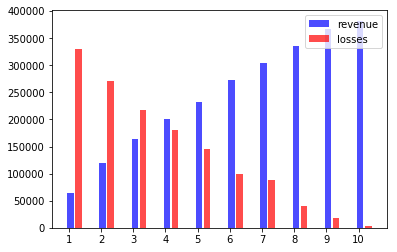

In [5]:
# Построим столбчатую диаграмму доходов и упущеной выгоды магазина
xs = range(len(kass_num))
plt.bar([x + 0.05 for x in xs],  # Координаты x стобцов
        revenue,  # Высота столбца соответствует полученным одходам
        width = 0.2, color = 'blue', alpha = 0.7, label = 'revenue',
        zorder = 2)
plt.bar([x + 0.3 for x in xs], losses,
        width = 0.2, color = 'red', alpha = 0.7, label = 'losses',
        zorder = 2)
plt.xticks(xs, kass_num)
plt.legend(loc='upper right')
plt.show()

In [7]:

np.cumsum(np.random.poisson(35, 10))

array([ 42,  81, 115, 136, 170, 191, 233, 268, 295, 328])